In [1]:
print('Importing packages...')
import os
import pandas
import numpy as np
import time
from matplotlib import pyplot as plt
from IPython.display import display, HTML
import matplotlib.patches as mpatches
import geopandas
from shapely.geometry import Point
import scipy
from scipy import stats as stats
#from mpl_toolkits.axes_grid1 import make_axes_locatable

pandas.set_option('display.max_colwidth', -1)
debug = 1
summary = {}


# Which city are we looking for?
thestate = 24
state_abbrev = 'md'
thecounty = 510
shapefile_dir = '/home/idies/workspace/Storage/raddick/Baltimore/shapefiles/'
cityname_file = 'baltimore'
cityname_display = 'Baltimore'


# Directories to look in
thisdir = '/home/idies/workspace/Storage/raddick/Baltimore/community_reinvestment_act/'
data_dir = '/home/idies/workspace/Temporary/raddick/cra_scratch_final/'
jobs_dir = data_dir + 'lodes_wac/'
census_dir = data_dir + 'acs5/'
city_data_dir = thisdir + 'city_data/'
code_lookup_dir = thisdir + 'code_guide_lookups/'
inflation_dir = '/home/idies/workspace/Storage/raddick/Baltimore/community_reinvestment_act/datasets/inflation/'
figdir = thisdir + 'figures/'
mapdir = thisdir + 'maps/'
baltimore_shapefile_basedir = '/home/idies/workspace/Storage/raddick/Baltimore/shapefiles/'
census_shapefile_tiger_basedir = '/home/idies/workspace/Temporary/raddick/census_scratch/shapefiles/'


# ANALYSIS OPTIONS
jobs_lower_limit = 10
pop_lower_limit = 1000

# MAPPING OPTIONS
scale = 0.25
thecolormap = 'viridis'
show_tract_labels = True
show_plot_labels = True

g = 0  # keep track of grand total of processing time
os.chdir(thisdir)
print('Now in directory: {0:}'.format(os.getcwd()))
print('ok')

Importing packages...
Now in directory: /home/idies/workspace/Storage/raddick/Baltimore/community_reinvestment_act
ok


# DONE!!!!!!!!!!!!!!!!! NOW WE CAN ANALYZE!!!!!!!!!!!!!!!!!!!!

## Get data

In [2]:
df = pandas.read_csv(city_data_dir+'{0:}_alldata.csv'.format(cityname_file), encoding='utf-8', index_col=['census_tract','activity_year'])
print('Done')

Done


# Loans by year

Defined 7 years in 0.026 seconds...
Done!


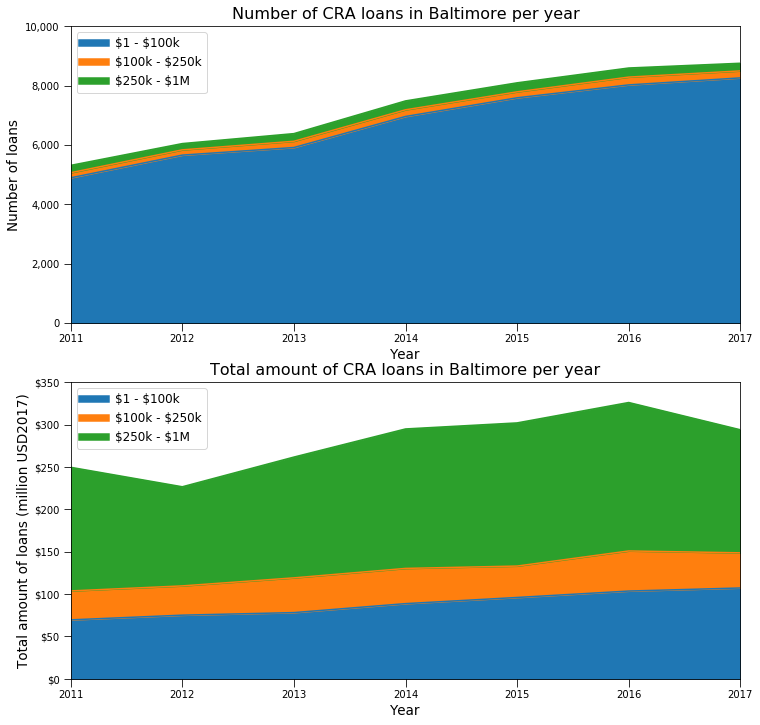

In [3]:
#df.reset_index().columns.tolist()
#df.groupby('action_taken_type').size()
s = time.time()
year_columns = ['nLoans1','nLoans100k','nLoans250k','nLoansToSmallest']
year_columns += ['nLoans','nWorkingLoans']
year_columns += ['nLoans1_per_totaljob','nLoans100k_per_totaljob']
year_columns += ['nLoans250k_per_totaljob','nLoansToSmallest_per_totaljob']
year_columns += ['nLoans_per_totaljob','nWorkingLoans_per_totaljob']
year_columns += ['nLoans1_per_sbjob','nLoans100k_per_sbjob','nLoans250k_per_sbjob']
year_columns += ['nLoansToSmallest_per_sbjob','nLoans_per_sbjob','nWorkingLoans_per_sbjob']
year_columns += ['amtLoans1_adj','amtLoans100k_adj', 'amtLoans250k_adj']
year_columns += ['amtLoansToSmallest_adj','amtLoans_adj', 'amtWorkingLoans_adj']
year_columns += ['amtLoans1_per_totaljob_adj','amtLoans100k_per_totaljob_adj']
year_columns += ['amtLoans250k_per_totaljob_adj','amtLoansToSmallest_per_totaljob_adj']
year_columns += ['amtLoans_per_totaljob_adj','amtWorkingLoans_per_totaljob_adj']
year_columns += ['amtLoans1_per_sbjob_adj','amtLoans100k_per_sbjob_adj']
year_columns += ['amtLoans250k_per_sbjob_adj','amtLoansToSmallest_per_sbjob_adj']
year_columns += ['amtLoans_per_sbjob_adj','amtWorkingLoans_per_sbjob_adj']

years_df = df.reset_index().groupby('activity_year')[year_columns].sum()

e = time.time()
g = g + (e-s)
print('Defined {0:,.0f} years in {1:,.3f} seconds...'.format(len(years_df), e-s))


fig, (ax1, ax2) = plt.subplots(2,1, figsize=(48*scale, 48*scale))

years_df[['nLoans1', 'nLoans100k', 'nLoans250k']].plot.area(ax=ax1)

ax1.set_xlim([2011, 2017])
ax1.set_xlabel('Year', fontsize=54*scale)
ax1.set_ylabel('Number of loans', fontsize=54*scale)
ax1.set_xticks(np.arange(2011,2018))
ax1.set_xticklabels(np.arange(2011,2018), size=40*scale)

y1_ticks = np.arange(0,12000,2000)
y1_labels = ['{0:,.0f}'.format(y) for y in y1_ticks]
ax1.set_yticks(y1_ticks)
ax1.tick_params(length=30*scale)
ax1.set_yticklabels(y1_labels, size=40*scale, y=1.08*scale)

leg1 = ax1.legend(["\$1 - \$100k", "\$100k - \$250k", "\$250k - \$1M"], fontsize=48*scale)
for legobj in leg1.legendHandles:
    legobj.set_linewidth(30*scale)

ax1.set_title('Number of CRA loans in {0:} per year'.format(cityname_display), fontsize=64*scale, y = 1+(.02*scale))

years_df[['amtLoans1_adj', 'amtLoans100k_adj', 'amtLoans250k_adj']].plot.area(ax=ax2)

ax2.set_xlim([2011, 2017])
ax2.set_xlabel('Year', fontsize=54*scale)
plt.ylabel('Total amount of loans (million USD2017)', fontsize=54*scale)
ax2.set_xticks(np.arange(2011,2018))
ax2.set_xticklabels(np.arange(2011,2018), size=40*scale)

y2_ticks = np.arange(0,400000000,50000000)
y2_labels = ['${0:,.0f}'.format(y/1000000) for y in y2_ticks]

ax2.set_yticks(y2_ticks)
ax2.tick_params(length=30*scale)
ax2.set_yticklabels(y2_labels, size=40*scale)

leg2 = ax2.legend(["\$1 - \$100k", "\$100k - \$250k", "\$250k - \$1M"], fontsize=48*scale)
for legobj in leg2.legendHandles:
    legobj.set_linewidth(30*scale)
    
ax2.set_title('Total amount of CRA loans in {0:} per year'.format(cityname_display), fontsize=64*scale, y = 1+(.02*scale))

#plt.show()
plt.savefig(figdir+'{0:}_fig1_loans_by_year.jpg'.format(cityname_file), format='jpg', dpi=300*scale)
print('Done!')



In [4]:
print('Summing loans across all years for each tract...')
tract_columns = ['nLoans1','nLoans100k','nLoans250k','nLoansToSmallest']
tract_columns += ['nLoans','nWorkingLoans']
tract_columns += ['nLoans1_per_totaljob','nLoans100k_per_totaljob']
tract_columns += ['nLoans250k_per_totaljob','nLoansToSmallest_per_totaljob']
tract_columns += ['nLoans_per_totaljob','nWorkingLoans_per_totaljob']
tract_columns += ['nLoans1_per_sbjob','nLoans100k_per_sbjob','nLoans250k_per_sbjob']
tract_columns += ['nLoansToSmallest_per_sbjob','nLoans_per_sbjob','nWorkingLoans_per_sbjob']
tract_columns += ['amtLoans1_adj','amtLoans100k_adj', 'amtLoans250k_adj']
tract_columns += ['amtLoansToSmallest_adj','amtLoans_adj', 'amtWorkingLoans_adj']
tract_columns += ['amtLoans1_per_totaljob_adj','amtLoans100k_per_totaljob_adj']
tract_columns += ['amtLoans250k_per_totaljob_adj','amtLoansToSmallest_per_totaljob_adj']
tract_columns += ['amtLoans_per_totaljob_adj','amtWorkingLoans_per_totaljob_adj']
tract_columns += ['amtLoans1_per_sbjob_adj','amtLoans100k_per_sbjob_adj']
tract_columns += ['amtLoans250k_per_sbjob_adj','amtLoansToSmallest_per_sbjob_adj']
tract_columns += ['amtLoans_per_sbjob_adj','amtWorkingLoans_per_sbjob_adj']

tracts_df = df.reset_index().groupby('census_tract')[tract_columns].sum()

print('Keeping only tracts that were the same across all years...')
nYears_s = df.reset_index().groupby('census_tract').size()
nYears_s.name = 'nYears'
tracts_df = tracts_df.join(nYears_s)

nTractsTotal = len(tracts_df)
#tracts_df.groupby('nYears').size()
nTracts7years = len(tracts_df[tracts_df['nYears'] == 7])

print('ok')


Summing loans across all years for each tract...
Keeping only tracts that were the same across all years...
ok


In [5]:
print('joining CRA levels...')
tract_info_2017_df = df.reset_index().set_index('census_tract')[df.reset_index().set_index('census_tract')['activity_year'] == 2017][['CSA2010', 'income_group_code', 'income_group', 'cra_level']]
tract_info_2017_df = tract_info_2017_df.rename(columns={'income_group_code': 'income_group_code_2017', 'income_group': 'income_group_2017', 'cra_level': 'cra_level_2017'})
tracts_df = tracts_df.join(tract_info_2017_df, how='left')

print('Done')

joining CRA levels...
Done


In [6]:
print('reading job data...')

print('reading state jobs data for {0:}...'.format(state_abbrev.upper()))
s = time.time()
state_raw_jobs_df = pandas.read_csv(jobs_dir+'jobs_data_{0:}.csv'.format(state_abbrev), index_col='rownumber')
e = time.time()
g = g + (e-s)
print('Read {0:,.0f} rows in {1:,.0f} seconds...'.format(len(state_raw_jobs_df), e-s))

print('keeping city jobs...')
s = time.time()
city_raw_jobs_df = state_raw_jobs_df[
    (state_raw_jobs_df['w_geocode'].apply(lambda x: int(str(x)[0:2]) == thestate))
    & (state_raw_jobs_df['w_geocode'].apply(lambda x: int(str(x)[2:5]) == thecounty))
 ]

print('keeping 2015 jobs...')
raw_jobs_2015_df = city_raw_jobs_df[city_raw_jobs_df['year'] == 2015]

e = time.time()
g = g + (e-s)

print('Kept {0:,.0f} rows in {1:,.0f} seconds!'.format(len(city_raw_jobs_df), e-s))

s = time.time()

print('finding census tracts...')
raw_jobs_2015_df = raw_jobs_2015_df.assign(census_tract = pandas.to_numeric(raw_jobs_2015_df['w_geocode'].apply(lambda x: str(x)[5:9] + '.' + str(x)[9:11]), errors='coerce'))#.drop_duplicates().sort_values()[0:3]
#sum_columns = ['census_tract']
sum_columns = [x for x in raw_jobs_2015_df.columns.tolist() if x not in ('w_geocode', 'createdate', 'year')]

print('grouping by census tract...')
jobs_2015_df = raw_jobs_2015_df[sum_columns].groupby('census_tract').sum()

print('joining jobs...')
tracts_df = tracts_df.join(jobs_2015_df[['C000', 'CFS01']], how='left')
tracts_df = tracts_df.rename(columns={'C000': 'total_jobs', 'CFS01': 'sb_jobs'})

print('Done!')

#print('Total time: {0:,.0f} minutes {1:,.0f} seconds...'.format(np.floor(g/60), g % 60))

#tracts_df.head(1).T


reading job data...
reading state jobs data for MD...


/home/idies/miniconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Read 16,241,520 rows in 127 seconds...
keeping city jobs...
keeping 2015 jobs...
Kept 1,691,314 rows in 80 seconds!
finding census tracts...
grouping by census tract...
joining jobs...
Done!


In [7]:
census_columns = ['pop_total', 'total_householders', 'pop_white', 'pop_black']
census_columns += ['black_householder', 'white_householder', 'female_householder', 'owner_occ_housing_units']
census_columns += ['mfi_adj', 'unemployed_16plus', 'poverty_past_12_months']
census_columns += ['median_home_value', 'median_year_built', 'labor_force_16plus']
census_columns += ['poverty_status_known', 'hs_grad_25plus', 'pop_25plus']

census_error_columns = ['pop_total_err', 'total_householders_serr', 'pop_white_err', 'pop_black_err']
census_error_columns += ['black_householder_err', 'white_householder_err', 'owner_occ_housing_units_err']
census_error_columns += ['mfi_err', 'female_householder_err', 'unemployed_16plus_err']
census_error_columns += ['poverty_past_12_months_err', 'median_home_value_err', 'median_year_built_err']
census_error_columns += ['labor_force_16plus_err', 'poverty_status_known_err']
census_error_columns += ['hs_grad_25plus_serr', 'pop_25plus_serr']

print('joining ACS 5-year estimates and margins of error...')
tracts_acs5_2017 = df.reset_index()[df.reset_index()['activity_year'] == 2017].set_index('census_tract')[census_columns]
tracts_acs5_err_2017 = df.reset_index()[df.reset_index()['activity_year'] == 2017].set_index('census_tract')[census_error_columns]

tracts_df = tracts_df.join(tracts_acs5_2017, how='left')
tracts_df = tracts_df.join(tracts_acs5_err_2017, how='left')

#tracts_df.head(1).T
print('Done!')


joining ACS 5-year estimates and margins of error...
Done!


In [8]:
#Guide on how to do this:
#### https://www.census.gov/content/dam/Census/library/publications/2018/acs/acs_general_handbook_2018_ch08.pdf

# X and Y are the measured values (not the errors) - X for the subsgroup and Y for the whole sample
# Let P = X/Y  (the proportion we calculated in the last step)
# dX and dY are the measured errors
# dP = (1/Y) * np.sqrt(dX**2 - (P**2 * dY**2))
# Standard error of P is dP/1.645
#### this calculation is done verbosely in fnid_pop_white_serr, quickly in other functions

def find_errors_in_pct(X, Y, dX, dY, verboselevel = 0):
    try:
        P = X / Y
        oneoverY = 1 / Y
        dXsq = dX**2
        dYsq = dY**2
        Psq = P**2
        PsqdYsq = Psq * dYsq
        if (PsqdYsq <= dXsq):
            underroot = dXsq - PsqdYsq
        else:
            underroot = dXsq + PsqdYsq
        rooty = np.sqrt(underroot)
        dP = oneoverY * rooty
        SE = dP / 1.645
        if (verboselevel >= 2):
#            print('X = pop_white, Y = pop_total')
            print('X = {0:.0f}, dX = {1:.0f} ({2:.1%} error)'.format(X, dX, dX/X))
            print('Y = {0:.0f}, dY = {1:.0f} ({2:.1%} error)'.format(Y, dY, dY/Y))
        if (verboselevel >= 3):
            print('P = {0:.3f}'.format(P))
            print('dXsq = {0:.0f}, dYsq = {1:.0f}, Psq = {2:.3f}'.format(dXsq, dYsq, Psq))
            print('PsqdYsq = {0:.0f}, underroot = {1:.0f}, rooty = {2:.3f}'.format(PsqdYsq, underroot, rooty))
            print('dP = {0:.3f}'.format(dP))
            print('SE = {0:.3f}'.format(SE))
        if (verboselevel >= 2):
            print('RESULT: {0:.2%} +/- {1:.2%}'.format(P, SE)) 
            print('\n')
        return pandas.to_numeric(SE, errors='coerce')
    except ZeroDivisionError:
        return np.nan
print('Defined functions to calculate standard errors in percentages!')
print('ok')

Defined functions to calculate standard errors in percentages!
ok


In [9]:
s = time.time()
verboselevel = 0

print('Calculating percentage values...')
tracts_df = tracts_df.assign(pct_white = tracts_df['pop_white'] / tracts_df['pop_total'])
tracts_df = tracts_df.assign(pct_black = tracts_df['pop_black'] / tracts_df['pop_total'])
tracts_df = tracts_df.assign(pct_white_householders = tracts_df['white_householder'] / tracts_df['total_householders'])
tracts_df = tracts_df.assign(pct_black_householders = tracts_df['black_householder'] / tracts_df['total_householders'])
tracts_df = tracts_df.assign(pct_female_householders = tracts_df['female_householder'] / tracts_df['total_householders'])
tracts_df = tracts_df.assign(pct_hs_grad = tracts_df['hs_grad_25plus'] / tracts_df['pop_25plus'])
tracts_df = tracts_df.assign(pct_unemployed = tracts_df['unemployed_16plus'] / tracts_df['labor_force_16plus'])
tracts_df = tracts_df.assign(pct_poverty = tracts_df['poverty_past_12_months'] / tracts_df['poverty_status_known'])

print('Calculating errors in percentages...')
tracts_df = tracts_df.assign(pct_white_serr = np.nan)
tracts_df = tracts_df.assign(pct_black_serr = np.nan)
tracts_df = tracts_df.assign(pct_white_householders_serr = np.nan)
tracts_df = tracts_df.assign(pct_black_householders_serr = np.nan)
tracts_df = tracts_df.assign(pct_female_householders_serr = np.nan)
tracts_df = tracts_df.assign(pct_hs_grad_serr = np.nan)
tracts_df = tracts_df.assign(pct_unemployed_serr = np.nan)
tracts_df = tracts_df.assign(pct_poverty_serr = np.nan)



for ix, thisrow in tracts_df.iterrows():
    if (verboselevel >= 2):
        print('Census tract {0:}...'.format(ix))
    tracts_df.loc[ix, 'pct_white_serr'] = find_errors_in_pct(thisrow['pop_white'], thisrow['pop_total'], thisrow['pop_white_err'], thisrow['pop_total_err'], verboselevel)
    tracts_df.loc[ix, 'pct_black_serr'] = find_errors_in_pct(thisrow['pop_black'], thisrow['pop_total'], thisrow['pop_black_err'], thisrow['pop_total_err'], verboselevel)
    tracts_df.loc[ix, 'pct_white_householders_serr'] = find_errors_in_pct(thisrow['white_householder'], thisrow['total_householders'], thisrow['white_householder_err'], thisrow['total_householders_serr'], verboselevel)
    tracts_df.loc[ix, 'pct_black_householders_serr'] = find_errors_in_pct(thisrow['black_householder'], thisrow['total_householders'], thisrow['black_householder_err'], thisrow['total_householders_serr'], verboselevel)
    tracts_df.loc[ix, 'pct_female_householders_serr'] = find_errors_in_pct(thisrow['female_householder'], thisrow['total_householders'], thisrow['black_householder_err'], thisrow['total_householders_serr'], verboselevel)
    tracts_df.loc[ix, 'pct_hs_grad_serr'] = find_errors_in_pct(thisrow['hs_grad_25plus'], thisrow['pop_25plus'], thisrow['hs_grad_25plus_serr'], thisrow['pop_25plus_serr'], verboselevel)
    tracts_df.loc[ix, 'pct_unemployed_serr'] = find_errors_in_pct(thisrow['unemployed_16plus'], thisrow['labor_force_16plus'], thisrow['hs_grad_25plus_serr'], thisrow['labor_force_16plus_err'], verboselevel)
    tracts_df.loc[ix, 'pct_poverty_serr'] = find_errors_in_pct(thisrow['poverty_past_12_months'], thisrow['poverty_status_known'], thisrow['poverty_past_12_months_err'], thisrow['poverty_status_known_err'], verboselevel)

if (verboselevel >= 1):
    for ix, thisrow in tracts_df.iterrows():
        print('Census tract {0:,.0f}'.format(ix))
        print('{0:,.0f} +/- {1:,.0f} white'.format(
            thisrow['pop_white'], thisrow['pop_white_err']
        ))
        print('{0:,.0f} +/- {1:,.0f} total'.format(
            thisrow['pop_total'], thisrow['pop_total_err']
        ))
        print('{0:.1%} +/- {1:.1%}'.format(
            thisrow['pct_white'], thisrow['pct_white_serr']
        ))
        print('\n')

print('backing up...')
tracts_df_bk = tracts_df

e = time.time()
print('Processed {0:,.0f} rows in {1:,.2f} seconds!'.format(len(tracts_df), e-s))


Calculating percentage values...
Calculating errors in percentages...
backing up...
Processed 207 rows in 2.69 seconds!


In [10]:
thisyear = 2017

if (debug > 0):
    print('Getting census tract shapefiles for {0:.0f}...'.format(thisyear))
tract_shapes_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/TRACT/tl_{0:.0f}_{1:02d}_tract.shp'.format(thisyear, thestate))
tract_shapes_gdf = tract_shapes_gdf[tract_shapes_gdf['COUNTYFP'] == '{0:03d}'.format(thecounty)]
tract_shapes_gdf.loc[:, 'NAME'] = pandas.to_numeric(tract_shapes_gdf['NAME'], errors='coerce')
tract_shapes_gdf = tract_shapes_gdf.assign(census_tract = pandas.to_numeric(tract_shapes_gdf['GEOID'].apply(lambda x: x[5:9]+'.'+x[9:]), errors='coerce'))
tract_shapes_gdf = tract_shapes_gdf.drop('GEOID', axis=1)
tract_shapes_gdf = tract_shapes_gdf.set_index('census_tract')

if (cityname_display == 'Baltimore'):
    print('cutting out harbor...')
    water_gdf = geopandas.read_file(baltimore_shapefile_basedir+'water/water.shp')
    water_gdf = water_gdf.to_crs(tract_shapes_gdf.crs)

tract_shapes_gdf = geopandas.overlay(tract_shapes_gdf, water_gdf[water_gdf['NAME'] == 'Harbor'], how='difference')

print('joining shapefiles onto data...')
#tracts_df = tracts_df.join(tract_shapes_gdf, how='left')#, lsuffix='_loans', rsuffix='_shapes')#[['GEOID_loans', 'GEOID_shapes']]
tracts_gdf = geopandas.GeoDataFrame(tracts_df.join(tract_shapes_gdf, how='left'), crs=tract_shapes_gdf.crs)

print('backing up geodataframe...')
tracts_gdf_bk = tracts_gdf

print("Done!")
#tracts_df.head(1).T


Getting census tract shapefiles for 2017...
cutting out harbor...
joining shapefiles onto data...
backing up geodataframe...
Done!


In [11]:
print('Before we make any cuts, how many people and jobs are there in {0:}?'.format(cityname_display))

print('Total population: {0:,.0f}'.format(tracts_df['pop_total'].sum()))
print('Total SB jobs: {0:,.0f}'.format(tracts_df['sb_jobs'].sum()))
print('Including only tracts with loans every year: {0:,.0f} out of {1:,.0f} total tracts...'.format(nTracts7years, nTractsTotal))
print('\n')
tracts_included_df = tracts_df[
    (tracts_df['nYears'] == 7)
    & (tracts_df['cra_level_2017'] != 'unknown')
    & (tracts_df['sb_jobs'] >= jobs_lower_limit)
    & (tracts_df['pop_total'] >= pop_lower_limit)
]
tracts_included_gdf = tracts_gdf[
    (tracts_gdf['nYears'] == 7)
    & (tracts_gdf['cra_level_2017'] != 'unknown')
    & (tracts_gdf['sb_jobs'] >= jobs_lower_limit)
    & (tracts_gdf['pop_total'] >= pop_lower_limit)
]

summary['nTracts'] = len(tracts_included_df)
summary['nWorkingLoans'] = tracts_included_df['nWorkingLoans'].sum()
summary['amtWorkingLoans_adj'] = tracts_included_df['amtWorkingLoans_adj'].sum()
summary['nSBjobs'] = tracts_included_df['sb_jobs'].sum()
summary['pop_total'] = tracts_included_df['pop_total'].sum()

#print('ok')
min_loan = tracts_included_df['amtWorkingLoans_per_sbjob_adj'].min()
max_loan = tracts_included_df['amtWorkingLoans_per_sbjob_adj'].max()
idmin_loan = tracts_included_df['amtWorkingLoans_per_sbjob_adj'].idxmin()
idmax_loan = tracts_included_df['amtWorkingLoans_per_sbjob_adj'].idxmax()

print('Minimum loan amount per small business job: ${0:,.0f}'.format(min_loan))
print('Maximum loan amount per small business job: ${0:,.0f} in tract {1:}'.format(max_loan, idmax_loan))


Before we make any cuts, how many people and jobs are there in Baltimore?
Total population: 615,549
Total SB jobs: 34,235
Including only tracts with loans every year: 187 out of 207 total tracts...


Minimum loan amount per small business job: $0
Maximum loan amount per small business job: $194,022 in tract 2503.03


making basic plot...
setting options...
adding colorbar...
adding tract labels...


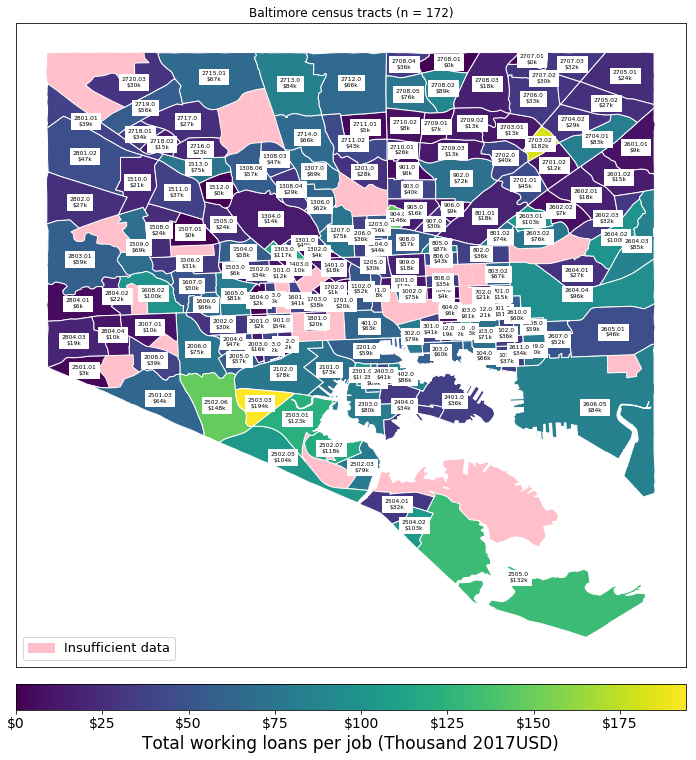

Done!


In [12]:
print('making basic plot...')
map1, ax = plt.subplots(1,1, figsize=(48*scale, 48*scale))

tract_shapes_gdf.plot(ax=ax, color='pink')

tracts_included_gdf.plot(column='amtWorkingLoans_per_sbjob_adj', ax=ax, cmap=thecolormap, edgecolor='white')

print('setting options...')
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.title('{0:} census tracts (n = {1:,.0f})'.format(
    cityname_display, len(tracts_included_gdf), fontsize=80*scale))

pink_patch = mpatches.Patch(color='pink', label='Insufficient data')
plt.legend(handles=[pink_patch], loc='lower left', fontsize=52*scale)

print('adding colorbar...')

cax = map1.add_axes([0.125, 0.08, 0.775, 0.03])

sm = plt.cm.ScalarMappable(cmap=thecolormap, norm=plt.Normalize(
    vmin=0, 
    vmax=tracts_included_gdf['amtWorkingLoans_per_sbjob_adj'].max()
))
## fake up the array of the scalar mappable. Urgh...
sm._A = []

cbar = fig.colorbar(sm, cax=cax, format='$%.0f', 
                    ticks=np.arange(0, 
                                    tracts_included_gdf['amtWorkingLoans_per_sbjob_adj'].max(),
                                    25000), 
                    orientation='horizontal')

cax.set_xticklabels(['${:,.0f}'.format(x/1000) for x in np.arange(0, tracts_included_gdf['amtWorkingLoans_per_sbjob_adj'].max(), 25000)], fontsize=56*scale)
cbar.set_label('Total working loans per job (Thousand 2017USD)', fontsize=68*scale)

if (show_tract_labels):
    print('adding tract labels...')
    for ix, thisrow in tracts_included_gdf.iterrows():
        annotator = str(ix).replace('-', '- ')
        annotator = annotator.replace('/', '/ ')
        annotator = annotator.replace(' ', '\n')
        annotator = annotator.upper()
        annotator += '\n'
        annotator += '${0:,.0f}k'.format(thisrow['amtWorkingLoans_per_sbjob_adj']/1000)
        ax.annotate(annotator, 
                    xy=(thisrow.geometry.centroid.x, thisrow.geometry.centroid.y), 
                    xytext=(thisrow.geometry.centroid.x, thisrow.geometry.centroid.y), 
                    backgroundcolor = 'white',
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=24*scale)
        map_outfile_name = '{0:}_overall_map_labeled.jpg'.format(cityname_file)
else:
    map_outfile_name = '{0:}_overall_map_unlabeled.jpg'.format(cityname_file)

plt.savefig(mapdir+map_outfile_name, format='jpg', dpi=300*scale)
plt.show()
print('Done!')


Done!


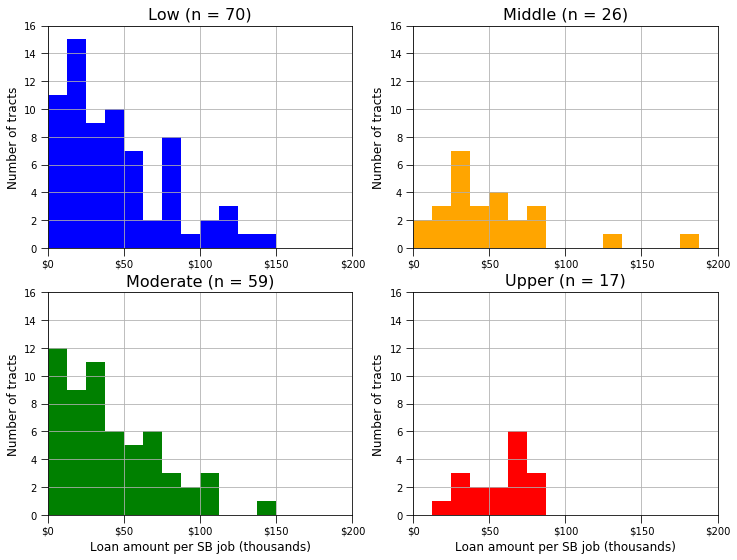

In [13]:
binlist = np.arange(0, 200000, 12500)
fig2a, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(48*scale, 36*scale))

tracts_included_df[tracts_included_df['cra_level_2017'] == 'low']['amtWorkingLoans_per_sbjob_adj'].hist(ax=ax1, color='blue', bins=binlist)
tracts_included_df[tracts_included_df['cra_level_2017'] == 'middle']['amtWorkingLoans_per_sbjob_adj'].hist(ax=ax2, color='orange', bins=binlist)
tracts_included_df[tracts_included_df['cra_level_2017'] == 'moderate']['amtWorkingLoans_per_sbjob_adj'].hist(ax=ax3, color='green', bins=binlist)
tracts_included_df[tracts_included_df['cra_level_2017'] == 'upper']['amtWorkingLoans_per_sbjob_adj'].hist(ax=ax4, color='red', bins=binlist)


for tax in (ax1, ax2, ax3, ax4):
    tax.set_xlim(0, 200000)
    tax.set_ylim(0, 16)
    if (tax in [ax3, ax4]):
        tax.set_xlabel('Loan amount per SB job (thousands)', fontsize=48*scale)
    tax.set_ylabel('Number of tracts', fontsize=48*scale)
    xticks = np.arange(0,225000,50000)
    xticklabels = ['${0:,.0f}'.format(x/1000) for x in xticks]
    tax.set_xticks(xticks)
    tax.set_xticklabels(xticklabels)
    yticks = np.arange(0,18,2)
    yticklabels = ['${0:,.0f}'.format(y) for y in yticks]
    tax.set_yticks(yticks)
    tax.tick_params(labelsize=40*scale, length=30*scale)
    
    
ax1.set_title('Low (n = {0:.0f})'.format(len(tracts_included_df[tracts_included_df['cra_level_2017'] == 'low'])), fontsize=64*scale, y=1+(0.02*scale))
ax2.set_title('Middle (n = {0:.0f})'.format(len(tracts_included_df[tracts_included_df['cra_level_2017'] == 'middle'])), fontsize=64*scale, y=1+(0.02*scale))
ax3.set_title('Moderate (n = {0:.0f})'.format(len(tracts_included_df[tracts_included_df['cra_level_2017'] == 'moderate'])), fontsize=64*scale, y=1+(0.02*scale))
ax4.set_title('Upper (n = {0:.0f})'.format(len(tracts_included_df[tracts_included_df['cra_level_2017'] == 'upper'])), fontsize=64*scale, y=1+(0.02*scale))
plt.savefig(figdir+'{0:}_fig2a_cra_level_histogram_all.jpg'.format(cityname_file), format='jpg', dpi=300*scale)
#plt.show()
print('Done!')



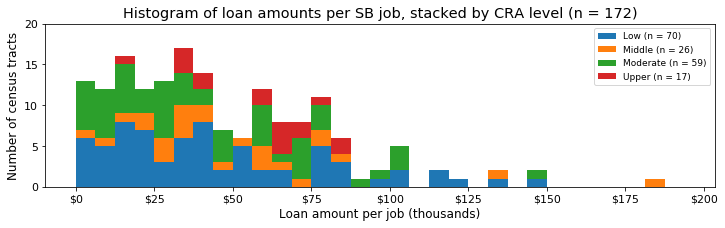

Done!
Outliers with more than $125,000 in adjusted loans per job
----------------------------------------------------------
Census tract 2503.03 (moderate, MFI $44k): 71 SB jobs, $194k in loans per SB job
Census tract 2703.02 (middle, MFI $91k): 35 SB jobs, $182k in loans per SB job
Census tract 2502.06 (moderate, MFI $72k): 403 SB jobs, $148k in loans per SB job
Census tract 904.0 (low, MFI $31k): 112 SB jobs, $146k in loans per SB job
Census tract 105.0 (middle, MFI $121k): 53 SB jobs, $133k in loans per SB job
Census tract 2505.0 (low, MFI $44k): 341 SB jobs, $132k in loans per SB job


In [14]:
binlist = np.arange(0, 200000, 6250)

fig2b, ax1 = plt.subplots(1,1, figsize=(48*scale, 12*scale))

plt.hist([
    tracts_included_df['amtWorkingLoans_per_sbjob_adj'][(tracts_included_df['cra_level_2017'] == 'low')], 
    tracts_included_df['amtWorkingLoans_per_sbjob_adj'][(tracts_included_df['cra_level_2017'] == 'middle')], 
    tracts_included_df['amtWorkingLoans_per_sbjob_adj'][(tracts_included_df['cra_level_2017'] == 'moderate')], 
    tracts_included_df['amtWorkingLoans_per_sbjob_adj'][(tracts_included_df['cra_level_2017'] == 'upper')], 
    ],
    bins = binlist,
    stacked = True
)

legendlist = []
legendlist.append('Low (n = {0:.0f})'.format(len(tracts_included_df[(tracts_included_df['cra_level_2017'] == 'low')])))
legendlist.append('Middle (n = {0:.0f})'.format(len(tracts_included_df[(tracts_included_df['cra_level_2017'] == 'middle')])))
legendlist.append('Moderate (n = {0:.0f})'.format(len(tracts_included_df[(tracts_included_df['cra_level_2017'] == 'moderate')])))
legendlist.append('Upper (n = {0:.0f})'.format(len(tracts_included_df[(tracts_included_df['cra_level_2017'] == 'upper')])))
plt.legend(legendlist, fontsize=36*scale)

plt.xlabel('Loan amount per job (thousands)', fontsize=48*scale)
xticks = np.arange(0, 225000, 25000)
xticklabels = ['${0:,.0f}'.format(x/1000) for x in xticks]
plt.xticks(xticks, xticklabels, fontsize=44*scale)

plt.ylabel('Number of census tracts',fontsize=48*scale)
plt.yticks(np.arange(0, 25, 5), np.arange(0, 25, 5), fontsize=44*scale)

plt.title('Histogram of loan amounts per SB job, stacked by CRA level (n = {0:.0f})'.format(
    len(tracts_included_df)
    ), fontsize=58*scale)

plt.savefig(figdir+'{0:}_fig2b_cra_level_histogram_stacked.jpg'.format(cityname_file), format='jpg', dpi=300*scale)
plt.show()
print('Done!')

print('Outliers with more than $125,000 in adjusted loans per job')
print('----------------------------------------------------------')
for ix, thisrow in tracts_included_df[[
 'cra_level_2017',
 'amtWorkingLoans_per_sbjob_adj',
 'sb_jobs',
 'mfi_adj']][tracts_included_df['amtWorkingLoans_per_sbjob_adj'] > 125000].sort_values(by='amtWorkingLoans_per_sbjob_adj', ascending=False).iterrows():
    print('Census tract {0:} ({1:}, MFI ${2:,.0f}k): {3:,.0f} SB jobs, ${4:,.0f}k in loans per SB job'.format(
                    ix, 
                    thisrow['cra_level_2017'], 
                    np.round(thisrow['mfi_adj'] / 1000, 0),
                    thisrow['sb_jobs'],
                    np.round(thisrow['amtWorkingLoans_per_sbjob_adj'] / 1000, 0)
                   ))


Figure saved!


CRA level,Tracts,Mean working loans per SB job,SEM working loans per SB job
low,70,"$44,799","$4,199"
middle,26,"$51,685","$7,531"
moderate,59,"$44,206","$4,965"
upper,17,"$57,823","$4,740"


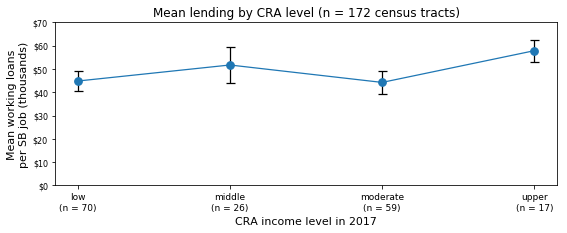

In [15]:
plot_type = 'line'

cra_level_df = pandas.DataFrame(tracts_included_df.groupby('cra_level_2017').size(), columns=['nTracts'])

cra_level_df = cra_level_df.assign(mean_working_loans_per_job_adj = tracts_included_df.groupby('cra_level_2017')['amtWorkingLoans_per_sbjob_adj'].mean())
cra_level_df = cra_level_df.assign(sem_working_loans_per_job_adj = tracts_included_df.groupby('cra_level_2017')['amtWorkingLoans_per_sbjob_adj'].sem())

fig4a, ax = plt.subplots(1,1, figsize=(36*scale, 12*scale))

label_list = cra_level_df.index.tolist()
for i in range(0, len(label_list)):
    label_list[i] += '\n(n = {0:,.0f})'.format(cra_level_df['nTracts'].loc[label_list[i]])

if (plot_type == 'line'):
    cra_level_df.plot(y='mean_working_loans_per_job_adj', yerr='sem_working_loans_per_job_adj', ax=ax, 
                      linewidth=5*scale, marker='.', ms=60*scale, 
                      capsize=18*scale, ecolor='black', elinewidth=5*scale, markeredgewidth=5*scale)
    plt.xticks(np.arange(0,4), label_list, fontsize=36*scale)
    
elif (plot_type == 'bar'):
    cra_level_df.plot.bar(y='mean_working_loans_per_job_adj', yerr='sem_working_loans_per_job_adj', ax=ax, 
                     capsize=18*scale, ecolor='black', 
                     error_kw=dict(lw=5*scale, capsize=18*scale, capthick=5*scale))
    plt.xticks(np.arange(0,4), label_list, rotation='horizontal', fontsize=36*scale)
else:
    print('Please select bar or line graph!')
    
plt.xlabel('CRA income level in 2017', fontsize=44*scale)
plt.ylabel('Mean working loans\nper SB job (thousands)', fontsize=44*scale)


yticks = np.arange(0,80000,10000)
yticklabels = ['${0:,.0f}'.format(x/1000) for x in yticks]
plt.yticks(yticks, yticklabels, fontsize=32*scale)

ax.get_legend().remove()
plt.title('Mean lending by CRA level (n = {0:.0f} census tracts)'.format(len(tracts_included_df)), fontsize=48*scale)
#plt.show()
plt.savefig(figdir+'{0:}_fig3a_line_uoa_tract.jpg'.format(cityname_file), format='jpg', dpi=300*scale)
print('Figure saved!')

thehtml = '<table>'
thehtml += '<tr><th>CRA level</th><th>Tracts</th><th>Mean working loans per SB job</th><th>SEM working loans per SB job</th></tr>'

for ix, thisrow in cra_level_df.iterrows():
    thehtml += '<tr>'
    thehtml += '<td>{0:}</td>'.format(ix)
    thehtml += '<td>{0:.0f}</td>'.format(thisrow['nTracts'])
    thehtml += '<td>${0:,.0f}</td>'.format(thisrow['mean_working_loans_per_job_adj'])
    thehtml += '<td>${0:,.0f}</td>'.format(thisrow['sem_working_loans_per_job_adj'])
    thehtml += '</tr>'
thehtml += '</table>'

display(HTML(thehtml))

#tracts_df.columns.tolist()

Figure saved!


CRA level,Population,SB jobs,Pct white,Loan amount per SB job
low,"207,952.3","7,941.1",14.1%,"$50,277"
middle,"75,634.9","8,730.4",60.0%,"$53,340"
moderate,"249,975.3","11,715.9",27.1%,"$55,553"
upper,"51,378.3","4,518.4",77.3%,"$58,737"


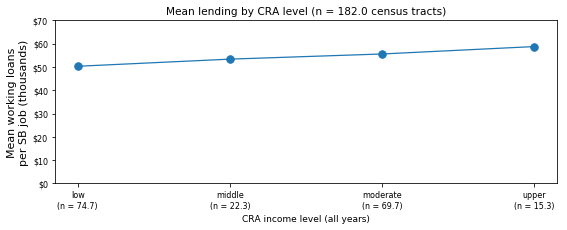

In [16]:
# Here's another way to do the CRA analysis: add up all tracts at each CRA level, regardless of which year or what tract...

#df.groupby(['cra_level']).size()
#df.columns.tolist()
plot_type = 'line'

cra_all_df = pandas.DataFrame(df[
    ['cra_level', 'amtWorkingLoans_adj', 'CFS01', 'pop_total', 'pop_white', 'pop_black']
][
    (df['cra_level'] != 'unknown')
    & (df['CFS01'] >= jobs_lower_limit)
    & (df['pop_total'] >= pop_lower_limit)
].groupby('cra_level').size(), columns=['nTractYears'])

cra_all_df = cra_all_df.join(
    df[
        ['cra_level', 'amtWorkingLoans_adj', 'CFS01', 'pop_total', 'pop_white', 'pop_black']
    ][
        (df['cra_level'] != 'unknown')
        & (df['CFS01'] >= jobs_lower_limit)
        & (df['pop_total'] >= pop_lower_limit)
    ].groupby('cra_level').sum()
)

# Divide by 7 to get "average" jobs, population, etc.
for x in ['nTractYears', 'CFS01', 'pop_total', 'pop_white', 'pop_black']:
    cra_all_df.loc[:, x] = cra_all_df[x] / 7

cra_all_df = cra_all_df.rename(columns={'nTractYears': 'nTracts'})
cra_all_df = cra_all_df.rename(columns={'CFS01': 'sb_jobs'})


cra_all_df = cra_all_df.assign(amtWorkingLoans_per_sbjob_adj = cra_all_df['amtWorkingLoans_adj'] / cra_all_df['sb_jobs'])
cra_all_df = cra_all_df.assign(pct_white = cra_all_df['pop_white'] / cra_all_df['pop_total'])
cra_all_df = cra_all_df.assign(pct_black = cra_all_df['pop_black'] / cra_all_df['pop_total'])

fig3b, ax = plt.subplots(1,1, figsize=(36*scale, 12*scale))

label_list = cra_all_df.index.tolist()
for i in range(0, len(label_list)):
    label_list[i] += '\n(n = {0:,.1f})'.format(cra_all_df['nTracts'].loc[label_list[i]])

if (plot_type == 'line'):
    cra_all_df.plot(y='amtWorkingLoans_per_sbjob_adj', ax=ax, # yerr='sem_working_loans_per_job_adj', 
                     linewidth=5*scale, marker='.', ms=60*scale)#, capsize=6, ecolor='black')
    plt.xticks(np.arange(0,4), label_list, fontsize=32*scale)
elif (plot_type == 'bar'):
    cra_all_df.plot.bar(y='amtWorkingLoans_per_sbjob_adj', ax=ax, #yerr='sem_working_loans_per_job_adj',
                       )#capsize=6, ecolor='black')
    plt.xticks(np.arange(0,4), label_list, rotation='horizontal', fontsize=32*scale)
else:
    print('Please select bar or line graph!')
    
plt.xlabel('CRA income level (all years)', fontsize=36*scale)
plt.ylabel('Mean working loans\nper SB job (thousands)', fontsize=44*scale)

yticks = np.arange(0,80000,10000)
plt.yticklabels = ['${0:,.0f}'.format(x) for x in yticks]
plt.yticks(yticks, yticklabels, fontsize=32*scale)

ax.get_legend().remove()
plt.title('Mean lending by CRA level (n = {0:.1f} census tracts)'.format(cra_all_df['nTracts'].sum()), 
         fontsize=42*scale)
#plt.show()
plt.savefig(figdir+'{0:}_fig3b_line_uoa_cra.jpg'.format(cityname_file), format='jpg', dpi=300*scale)
print('Figure saved!')

htmlString = '\n\n'
htmlString += '<table>'
htmlString += '<tr><th>CRA level</th><th>Population</th><th>SB jobs</th><th>Pct white</th><th>Loan amount per SB job</th></tr>'
for ix, thisrow in cra_all_df[['pop_total', 'sb_jobs', 'pct_white', 'amtWorkingLoans_per_sbjob_adj']].iterrows():
    htmlString += '<tr>'
    htmlString += '<td>{0:}</td><td>{1:,.1f}</td><td>{2:,.1f}</td><td>{3:.1%}</td><td>${4:,.0f}</td>'.format(ix, thisrow['pop_total'], thisrow['sb_jobs'], thisrow['pct_white'], thisrow['amtWorkingLoans_per_sbjob_adj'])
    htmlString += '</tr>'    
htmlString += '</table>'

display(HTML(htmlString))



In [17]:
print('identifying tracts with much or little poverty...')

tracts_included_df = tracts_included_df.assign(poverty_rate = tracts_included_df['poverty_past_12_months'] / tracts_included_df['poverty_status_known'])

print('Quantiles of poverty rate in {0:}:'.format(cityname_display))
print('Median {0:.1%}\nrichest decile {1:.1%}\nrichest quartile {2:.1%}\npoorest quartile {3:.1%}\npoorest decile {4:.1%}'.format(
    tracts_included_df['poverty_rate'].quantile(0.5), 
    tracts_included_df['poverty_rate'].quantile(0.1), 
    tracts_included_df['poverty_rate'].quantile(0.25), 
    tracts_included_df['poverty_rate'].quantile(0.75), 
    tracts_included_df['poverty_rate'].quantile(0.9)
))

print('\n')
htmlstring = ''
#htmlstring += "<p>OK, sure, let's use Chicago's definition of high poverty as >= 10% poverty rate</p>"

tracts_included_df = tracts_included_df.assign(poverty_class = np.nan)
tracts_included_df.loc[tracts_included_df['poverty_rate'] > 0.3, 'poverty_class'] = 'much'
tracts_included_df.loc[tracts_included_df['poverty_rate'] < 0.1, 'poverty_class'] = 'little'

print('calculating excess white and excess black tracts...')
city_pct_white = tracts_included_df['pop_white'].sum() / tracts_included_df['pop_total'].sum()
city_pct_black = tracts_included_df['pop_black'].sum() / tracts_included_df['pop_total'].sum()
print('City-wide percent of white residents: {0:.0%}'.format(city_pct_white))
print('City-wide percent of black residents: {0:.0%}'.format(city_pct_black))

tracts_included_df = tracts_included_df.assign(excess_race = 'none')

tracts_included_df.loc[tracts_included_df['pct_white'] > city_pct_white, 'excess_race'] = 'white'
tracts_included_df.loc[tracts_included_df['pct_black'] > city_pct_black, 'excess_race'] = 'black'

summary['city_pct_black'] = city_pct_black

print('Done!')

identifying tracts with much or little poverty...
Quantiles of poverty rate in Baltimore:
Median 21.6%
richest decile 7.6%
richest quartile 12.6%
poorest quartile 31.4%
poorest decile 40.7%


calculating excess white and excess black tracts...
City-wide percent of white residents: 30%
City-wide percent of black residents: 63%
Done!


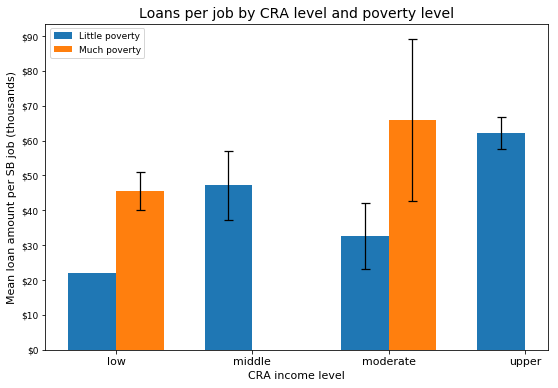

CRA level,Number ofTracts,Mean loan valueper SB job,SEM loan valueper SB job
Low,1,"$22,070",N/A
Middle,12,"$47,132","$9,785"
Moderate,6,"$32,594","$9,389"
Upper,14,"$62,113","$4,581"
CRA level,Number ofTracts,Mean loan valueper SB job,SEM loan valueper SB job
Low,44,"$45,567","$5,559"
Middle,0,N/A,N/A
Moderate,7,"$65,909","$23,189"
Upper,0,N/A,N/A


What is that weird tract with little poverty but low CRA?


/home/idies/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:94: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


census_tract,2804.02
nWorkingLoans,23
amtWorkingLoans_adj,541715
sb_jobs,23
amtWorkingLoans_per_sbjob_adj,22069.6
cra_level_2017,low
total_jobs,1088
pop_total,1657
mfi_adj,47895
pct_white,0.006035
pct_black,0.966807


In [18]:
cra_level_poverty_df = pandas.DataFrame()

cra_level_poverty_df = cra_level_poverty_df.assign(nTracts = tracts_included_df.groupby(['poverty_class','cra_level_2017']).size())

cra_level_poverty_df = cra_level_poverty_df.assign(mean_amtWorkingLoans_adj_per_sbjob = tracts_included_df.groupby(['poverty_class','cra_level_2017'])['amtWorkingLoans_per_sbjob_adj'].mean())

cra_level_poverty_df = cra_level_poverty_df.assign(sem_amtWorkingLoans_adj_per_sbjob = tracts_included_df.groupby(['poverty_class','cra_level_2017'])['amtWorkingLoans_per_sbjob_adj'].sem())

cra_level_poverty_df.loc[('much', 'middle'),  ['nTracts', 'mean_amtWorkingLoans_adj_per_sbjob', 'sem_amtWorkingLoans_adj_per_sbjob']] = [0, np.nan, np.nan]
cra_level_poverty_df.loc[('much', 'upper'),  ['nTracts', 'mean_amtWorkingLoans_adj_per_sbjob', 'sem_amtWorkingLoans_adj_per_sbjob']] = [0, np.nan, np.nan]
# Get into correct order for graphing
cra_level_poverty_df = cra_level_poverty_df.loc[[
    ('little', 'low'), ('little', 'middle'), ('little', 'moderate'), ('little', 'upper'), 
    ('much', 'low'), ('much', 'middle'), ('much', 'moderate'), ('much', 'upper')]]


label_sorter = np.arange(4)
width = 0.35

low_means = cra_level_poverty_df.xs('little')['mean_amtWorkingLoans_adj_per_sbjob'].tolist()
low_sems = cra_level_poverty_df.xs('little')['sem_amtWorkingLoans_adj_per_sbjob'].tolist()
high_means = cra_level_poverty_df.xs('much')['mean_amtWorkingLoans_adj_per_sbjob'].tolist()
high_sems = cra_level_poverty_df.xs('much')['sem_amtWorkingLoans_adj_per_sbjob'].tolist()


fig4, ax = plt.subplots(1,1,figsize=(36*scale, 24*scale))
plt.bar(label_sorter, low_means, width, yerr=low_sems, label='Little poverty', error_kw=dict(lw=5*scale, capsize=18*scale, capthick=5*scale))
plt.bar(label_sorter+width, high_means, width, yerr=high_sems, label='Much poverty', error_kw=dict(lw=5*scale, capsize=18*scale, capthick=5*scale))

plt.xticks(label_sorter + width / 2, ('low', 'middle', 'moderate', 'upper'), fontsize=44*scale)
yticks = np.arange(0,100000,10000)
yticklabels = ['${0:,.0f}'.format(x/1000) for x in yticks]
plt.yticks(yticks, yticklabels, fontsize=36*scale)

plt.xlabel('CRA income level', fontsize=44*scale)
plt.ylabel('Mean loan amount per SB job (thousands)', fontsize=44*scale)
plt.legend(fontsize=36*scale)
plt.title('Loans per job by CRA level and poverty level', fontsize=56*scale)

plt.savefig(figdir+'{0:}_fig4a_cra_level_poverty.jpg'.format(cityname_file), format='jpg', dpi=300*scale)

plt.show()

htmlString = ''
htmlString += '<p>Little poverty</p>'
htmlString += '<table>'
htmlString += '<tr><th>CRA level</th><th>Number of<br />Tracts</th><th>Mean loan value<br />per SB job</th><th>SEM loan value<br />per SB job</th></tr>'
for ix, thisrow in cra_level_poverty_df.xs('little').iterrows():
    htmlString += '<tr>'
    htmlString += '<td>{0:}</td>'.format(ix.capitalize())
    htmlString += '<td>{0:.0f}</td>'.format(thisrow['nTracts'])
    if (np.isnan(thisrow['mean_amtWorkingLoans_adj_per_sbjob'])):
        htmlString += '<td>N/A</td>'
    else:
        htmlString += '<td>${0:,.0f}</td>'.format(thisrow['mean_amtWorkingLoans_adj_per_sbjob'])
    
    if (np.isnan(thisrow['sem_amtWorkingLoans_adj_per_sbjob'])):
        htmlString += '<td>N/A</td>'
    else:
        htmlString += '<td>${0:,.0f}</td>'.format(thisrow['sem_amtWorkingLoans_adj_per_sbjob'])
    htmlString += '</tr>'
htmlString += '</table>' 

htmlString += '<p>Much poverty</p>'
htmlString += '<table>'
htmlString += '<tr><th>CRA level</th><th>Number of<br />Tracts</th><th>Mean loan value<br />per SB job</th><th>SEM loan value<br />per SB job</th></tr>'
for ix, thisrow in cra_level_poverty_df.xs('much').iterrows():
    htmlString += '<tr>'
    htmlString += '<td>{0:}</td>'.format(ix.capitalize())
    htmlString += '<td>{0:.0f}</td>'.format(thisrow['nTracts'])
    if (np.isnan(thisrow['mean_amtWorkingLoans_adj_per_sbjob'])):
        htmlString += '<td>N/A</td>'
    else:
        htmlString += '<td>${0:,.0f}</td>'.format(thisrow['mean_amtWorkingLoans_adj_per_sbjob'])
    
    if (np.isnan(thisrow['sem_amtWorkingLoans_adj_per_sbjob'])):
        htmlString += '<td>N/A</td>'
    else:
        htmlString += '<td>${0:,.0f}</td>'.format(thisrow['sem_amtWorkingLoans_adj_per_sbjob'])
    htmlString += '</tr>'
htmlString += '</table>' 
display(HTML(htmlString))


#tracts_df.head(1).T

#cra_level_poverty_df

print('What is that weird tract with little poverty but low CRA?')

tracts_included_df[['nWorkingLoans', 'amtWorkingLoans_adj', 'sb_jobs', 'amtWorkingLoans_per_sbjob_adj',
  'cra_level_2017', 'total_jobs', 'pop_total', 'mfi_adj', 'pct_white', 'pct_black',
  'pct_poverty', 'poverty_rate', 'poverty_class', 'excess_race']][
    (tracts_included_df['poverty_class'] == 'little') & (tracts_df['cra_level_2017'] == 'low')
].T

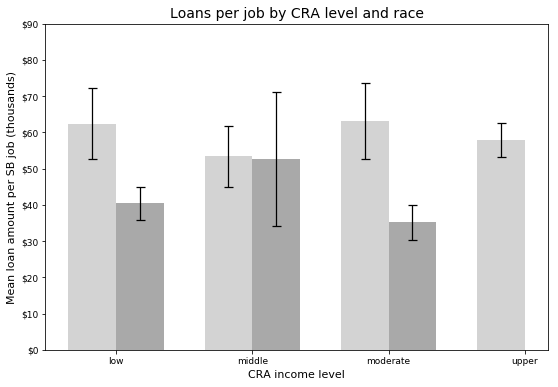

CRA level,Number ofTracts,Mean loan valueper SB job,SEM loan valueper SB job
Low,11,"$62,439","$9,875"
Middle,22,"$53,354","$8,477"
Moderate,19,"$63,118","$10,500"
Upper,17,"$57,823","$4,740"
CRA level,Number ofTracts,Mean loan valueper SB job,SEM loan valueper SB job
Low,57,"$40,430","$4,567"
Middle,3,"$52,682","$18,402"
Moderate,40,"$35,222","$4,846"
Upper,0,N/A,N/A


In [19]:
cra_level_race_df = pandas.DataFrame()

cra_level_race_df = cra_level_race_df.assign(nTracts = tracts_included_df.groupby(['excess_race','cra_level_2017']).size())

cra_level_race_df = cra_level_race_df.assign(mean_amtWorkingLoans_adj_per_sbjob = tracts_included_df.groupby(['excess_race','cra_level_2017'])['amtWorkingLoans_per_sbjob_adj'].mean())

cra_level_race_df = cra_level_race_df.assign(sem_amtWorkingLoans_adj_per_sbjob = tracts_included_df.groupby(['excess_race','cra_level_2017'])['amtWorkingLoans_per_sbjob_adj'].sem())

cra_level_race_df.loc[('black', 'upper'),  ['nTracts', 'mean_amtWorkingLoans_adj_per_sbjob', 'sem_amtWorkingLoans_adj_per_sbjob']] = [0, np.nan, np.nan]
#cra_level_race_df = cra_level_race_df.reset_index()

label_sorter = np.arange(4)
width = 0.35

white_means = cra_level_race_df.xs('white')['mean_amtWorkingLoans_adj_per_sbjob'].tolist()
white_sems = cra_level_race_df.xs('white')['sem_amtWorkingLoans_adj_per_sbjob'].tolist()
black_means = cra_level_race_df.xs('black')['mean_amtWorkingLoans_adj_per_sbjob'].tolist()
black_sems = cra_level_race_df.xs('black')['sem_amtWorkingLoans_adj_per_sbjob'].tolist()

fig4b, ax = plt.subplots(1,1, figsize=(36*scale, 24*scale))

plt.bar(label_sorter, white_means, width, yerr=white_sems, label='White', color='lightgray', error_kw=dict(lw=5*scale, capsize=18*scale, capthick=5*scale))
plt.bar(label_sorter+width, black_means, width, yerr=black_sems, label='Black', color='darkgray', error_kw=dict(lw=5*scale, capsize=18*scale, capthick=5*scale))

plt.xticks(label_sorter + width / 2, ('low', 'middle', 'moderate', 'upper'), fontsize=36*scale)
yticks = np.arange(0,100000,10000)
yticklabels = ['${0:,.0f}'.format(x/1000) for x in yticks]
plt.yticks(yticks, yticklabels, fontsize=36*scale)

plt.xlabel('CRA income level', fontsize=44*scale)
plt.ylabel('Mean loan amount per SB job (thousands)', fontsize=44*scale)
plt.title('Loans per job by CRA level and race', fontsize=56*scale)

plt.savefig(figdir+'{0:}_fig4b_cra_level_race.jpg'.format(cityname_file), format='jpg', dpi=300*scale)
plt.show()

htmlString = ''
htmlString += '<p>White</p>'
htmlString += '<table>'
htmlString += '<tr><th>CRA level</th><th>Number of<br />Tracts</th><th>Mean loan value<br />per SB job</th><th>SEM loan value<br />per SB job</th></tr>'
for ix, thisrow in cra_level_race_df.xs('white').iterrows():
    htmlString += '<tr>'
    htmlString += '<td>{0:}</td>'.format(ix.capitalize())
    htmlString += '<td>{0:.0f}</td>'.format(thisrow['nTracts'])
    htmlString += '<td>${0:,.0f}</td>'.format(thisrow['mean_amtWorkingLoans_adj_per_sbjob'])
    htmlString += '<td>${0:,.0f}</td>'.format(thisrow['sem_amtWorkingLoans_adj_per_sbjob'])
    htmlString += '</tr>'
htmlString += '</table>' 

htmlString += '<p>Black</p>'
htmlString += '<table>'
htmlString += '<tr><th>CRA level</th><th>Number of<br />Tracts</th><th>Mean loan value<br />per SB job</th><th>SEM loan value<br />per SB job</th></tr>'
for ix, thisrow in cra_level_race_df.xs('black').iterrows():
    htmlString += '<tr>'
    htmlString += '<td>{0:}</td>'.format(ix.capitalize())
    htmlString += '<td>{0:.0f}</td>'.format(thisrow['nTracts'])
    if (np.isnan(thisrow['mean_amtWorkingLoans_adj_per_sbjob'])):
        htmlString += '<td>N/A</td>'
    else:
        htmlString += '<td>${0:,.0f}</td>'.format(thisrow['mean_amtWorkingLoans_adj_per_sbjob'])
    
    if (np.isnan(thisrow['sem_amtWorkingLoans_adj_per_sbjob'])):
        htmlString += '<td>N/A</td>'
    else:
        htmlString += '<td>${0:,.0f}</td>'.format(thisrow['sem_amtWorkingLoans_adj_per_sbjob'])
    htmlString += '</tr>'
htmlString += '</table>' 
display(HTML(htmlString))
#tracts_df.head(1).T

Done!


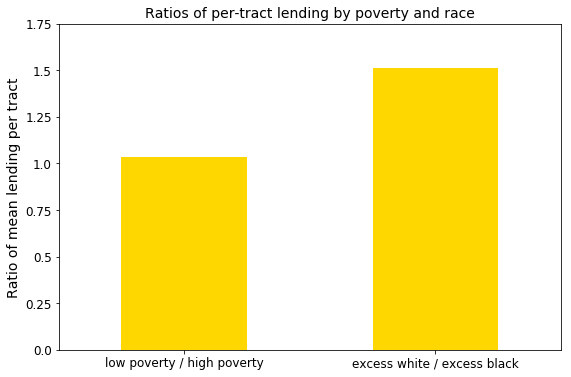

In [20]:
htmlstring = ''
htmlstring += '<table>'
htmlstring += '<tr><th>Poverty class</th><th>Number of tracts</th><th>Mean loan amount<br />per small business job</th><th>Standard error<br />of the mean</th></tr>'
htmlstring += '<tr><td>{0:}</td><td>{1:.0f}</td><td>${2:,.0f}</td><td>${3:,.0f}</tr>'.format(
    'Little poverty', 
    len(tracts_included_df[tracts_included_df['poverty_class'] == 'little']), 
    tracts_included_df['amtWorkingLoans_per_sbjob_adj'][tracts_included_df['poverty_class'] == 'little'].mean(), 
    tracts_included_df['amtWorkingLoans_per_sbjob_adj'][tracts_included_df['poverty_class'] == 'little'].sem()
)
    
htmlstring += '<tr><td>{0:}</td><td>{1:.0f}</td><td>${2:,.0f}</td><td>${3:,.0f}</tr>'.format(
    'Much poverty', 
    len(tracts_included_df[tracts_included_df['poverty_class'] == 'much']), 
    tracts_included_df['amtWorkingLoans_per_sbjob_adj'][tracts_included_df['poverty_class'] == 'much'].mean(), 
    tracts_included_df['amtWorkingLoans_per_sbjob_adj'][tracts_included_df['poverty_class'] == 'much'].sem()
)
    
htmlstring += '<tr><td>{0:}</td><td>-</td><td>{1:.2f}</td><td>-</td>'.format('Little / Much', 
                                                      tracts_included_df['amtWorkingLoans_per_sbjob_adj'][tracts_included_df['poverty_class'] == 'little'].mean() / 
                                                      tracts_included_df['amtWorkingLoans_per_sbjob_adj'][tracts_included_df['poverty_class'] == 'much'].mean()
                                                     )
htmlstring += '</table>'


htmlstring += '<table>'
htmlstring += '<tr><th>Excess Race</th><th>Number of tracts</th><th>Mean loan amount<br />per small business job</th><th>Standard error<br />of the mean</th></tr>'
htmlstring += '<tr><td>{0:}</td><td>{1:.0f}</td><td>${2:,.0f}</td><td>${3:,.0f}</td></tr>'.format(
    'White', 
    len(tracts_included_df[tracts_included_df['excess_race'] == 'white']), 
    tracts_included_df['amtWorkingLoans_per_sbjob_adj'][tracts_included_df['excess_race'] == 'white'].mean(), 
    tracts_included_df['amtWorkingLoans_per_sbjob_adj'][tracts_included_df['excess_race'] == 'white'].sem()
)
htmlstring += '<tr><td>{0:}</td><td>{1:.0f}</td><td>${2:,.0f}</td><td>${3:,.0f}</td></tr>'.format(
    'White', 
    len(tracts_included_df[tracts_included_df['excess_race'] == 'black']), 
    tracts_included_df['amtWorkingLoans_per_sbjob_adj'][tracts_included_df['excess_race'] == 'black'].mean(), 
    tracts_included_df['amtWorkingLoans_per_sbjob_adj'][tracts_included_df['excess_race'] == 'black'].sem()
)
htmlstring += '<tr><td>{0:}</td><td>-</td><td>{1:.2f}</td><td>-</td>'.format('White / Black', 
                                                    tracts_included_df['amtWorkingLoans_per_sbjob_adj'][tracts_included_df['excess_race'] == 'white'].mean() / 
                                                    tracts_included_df['amtWorkingLoans_per_sbjob_adj'][tracts_included_df['excess_race'] == 'black'].mean()
                                                   )
htmlstring += '</table>'



bar_chart_df = pandas.DataFrame(data=None, columns=['mean_loan_amt_per_sbjob'])
bar_chart_df.loc['low poverty / high poverty', 'mean_loan_amt_per_sbjob'] = tracts_included_df['amtWorkingLoans_per_sbjob_adj'][tracts_included_df['poverty_class'] == 'little'].mean() / tracts_included_df['amtWorkingLoans_per_sbjob_adj'][tracts_included_df['poverty_class'] == 'much'].mean()
bar_chart_df.loc['excess white / excess black', 'mean_loan_amt_per_sbjob'] = tracts_included_df['amtWorkingLoans_per_sbjob_adj'][tracts_included_df['excess_race'] == 'white'].mean() / tracts_included_df['amtWorkingLoans_per_sbjob_adj'][tracts_included_df['excess_race'] == 'black'].mean()

fig5, ax = plt.subplots(1,1, figsize=(36*scale, 24*scale))
bar_chart_df.plot.bar(ax=ax, color='gold')

plt.xticks(np.arange(0,2), bar_chart_df.index.values, rotation='horizontal', fontsize=48*scale)

plt.ylabel('Ratio of mean lending per tract', fontsize=56*scale)
plt.yticks(np.arange(0, 2, 0.25), np.arange(0, 2, 0.25), fontsize=48*scale)

plt.title('Ratios of per-tract lending by poverty and race', fontsize=56*scale)
ax.get_legend().remove()

plt.savefig(figdir+'{0:}_fig5_lending_radios.jpg'.format(cityname_file), format='jpg', dpi=300*scale)
print('Done!')

plt.show()

summary['lending_ratio_race'] = tracts_included_df['amtWorkingLoans_per_sbjob_adj'][tracts_included_df['excess_race'] == 'white'].mean() / tracts_included_df['amtWorkingLoans_per_sbjob_adj'][tracts_included_df['excess_race'] == 'black'].mean()
display(HTML(htmlstring))

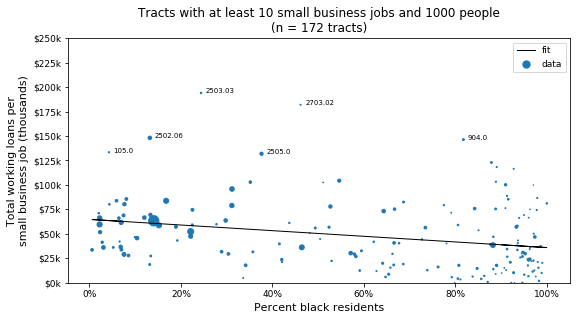

Linear model fit: amtWorkingLoans_adj_per_sb_job = -$288 * pct_black + $64,829 (r^2 = 0.075)


In [21]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    tracts_included_df['pct_black'][tracts_included_df['pct_black'].notnull()].apply(lambda x: x * 100).values, 
    tracts_included_df['amtWorkingLoans_per_sbjob_adj'][tracts_included_df['pct_black'].notnull()].values
)

fig6, (ax1) = plt.subplots(1,1, figsize=(36*scale,18*scale))
siz = tracts_included_df['sb_jobs'].apply(lambda x: (x/2)*(scale**2)).tolist()

ax1.scatter(tracts_included_df['pct_black'], 
            tracts_included_df['amtWorkingLoans_per_sbjob_adj'], 
            s=siz)

ax1.plot(tracts_included_df['pct_black'], slope*tracts_included_df['pct_black'].apply(lambda x: x * 100) + intercept, 
         color='black', linewidth=4*scale)

ax1.set_xlabel('Percent black residents', fontsize=44*scale)
ax1.set_ylabel('Total working loans per\nsmall business job (thousands)', fontsize=44*scale)

xticks = np.arange(0, 1.2, 0.2)
xlabels = ['{0:.0%}'.format(x) for x in xticks]
plt.xticks(xticks, xlabels, fontsize=36*scale)

plt.ylim([0, 250000])
yticks = np.arange(0, 275000, 25000)
ylabels = ['${0:.0f}k'.format(x/1000) for x in yticks]
plt.yticks(yticks, ylabels, fontsize=36*scale)
plt.legend(['fit', 'data'], fontsize=36*scale)

if (show_plot_labels):
    for ix, thisrow in tracts_included_df.iterrows():
        if (thisrow['amtWorkingLoans_per_sbjob_adj'] > 125000):
            annotator = str(ix).replace('-', '- ')
            annotator = annotator.replace('/', '/ ')
            annotator = annotator.replace(' ', '\n')
            annotator = annotator.upper()
            ax1.annotate(annotator, 
                        xy=(thisrow['pct_black'], thisrow['amtWorkingLoans_per_sbjob_adj']), fontsize=28*scale,
                        xytext=(thisrow['pct_black'] + .01, thisrow['amtWorkingLoans_per_sbjob_adj'] - 500))

ax1.set_title('Tracts with at least {0:.0f} small business jobs and {1:.0f} people\n(n = {2:.0f} tracts)'.format(
    jobs_lower_limit, 
    pop_lower_limit, 
    len(tracts_included_df), fontsize=56*scale))

plt.savefig(figdir+'{0:}_fig6_scatter_by_race.jpg'.format(cityname_file), format='jpg', dpi=300*scale)
plt.show()

if (np.sign(slope) == -1):
    signsign_slope = '-'
print('Linear model fit: amtWorkingLoans_adj_per_sb_job = {0:}${1:,.0f} * pct_black + ${2:,.0f} (r^2 = {3:.3f})'.format(signsign_slope, np.abs(slope), intercept, r_value**2))

summary['lending_race_linear_fit'] = slope
summary['lending_race_linear_rsq'] = r_value ** 2

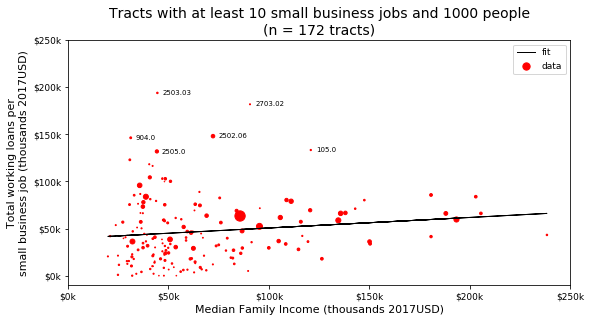

Linear model fit: mfi_adj = 0.112 * mfi_adj + $39,465 (r^2 = 0.016)


In [22]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    tracts_included_df['mfi_adj'][tracts_df['mfi_adj'].notnull()].values, 
    tracts_included_df['amtWorkingLoans_per_sbjob_adj'][tracts_df['mfi_adj'].notnull()].values
)

fig, (ax1) = plt.subplots(1,1,figsize=(36*scale,18*scale))
siz = tracts_included_df['sb_jobs'].apply(lambda x: (x/2)*(scale**2)).tolist()

ax1.scatter(tracts_included_df['mfi_adj'], 
            tracts_included_df['amtWorkingLoans_per_sbjob_adj'], s=siz, color='red')

ax1.plot(tracts_included_df['mfi_adj'], slope*tracts_included_df['mfi_adj'] + intercept, 
         color='black', linewidth=4*scale)

ax1.set_xlabel('Median Family Income (thousands 2017USD)', fontsize=44*scale)
ax1.set_ylabel('Total working loans per\nsmall business job (thousands 2017USD)', fontsize=44*scale)

xticks = np.arange(0, 300000, 50000)
xlabels = ['${0:.0f}k'.format(x/1000) for x in xticks]
plt.xticks(xticks, xlabels, fontsize=36*scale)

#plt.ylim([0, 200000])
yticks = np.arange(0, 300000, 50000)
ylabels = ['${0:.0f}k'.format(x/1000) for x in yticks]
plt.yticks(yticks, ylabels, fontsize=36*scale)
plt.legend(['fit', 'data'], fontsize=36*scale)

if (show_plot_labels):
    for ix, thisrow in tracts_included_df.iterrows():
        if (thisrow['amtWorkingLoans_per_sbjob_adj'] > 125000):
            annotator = str(ix).replace('-', '- ')
            annotator = annotator.replace('/', '/ ')
            annotator = annotator.replace(' ', '\n')
            annotator = annotator.upper()
            ax1.annotate(annotator, 
                         xy=(thisrow['mfi_adj'], thisrow['amtWorkingLoans_per_sbjob_adj']), fontsize=28*scale, 
                         xytext=(thisrow['mfi_adj'] + 2500, thisrow['amtWorkingLoans_per_sbjob_adj'] - 2000)
                        )
            
                
            
ax1.set_title('Tracts with at least {0:.0f} small business jobs and {1:.0f} people\n(n = {2:.0f} tracts)'.format(
    jobs_lower_limit, 
    pop_lower_limit, 
    len(tracts_included_df)
), fontsize=56*scale)

plt.savefig(figdir+'{0:}_fig7_scatter_by_mfi.jpg'.format(cityname_file), format='jpg', dpi=300*scale)
plt.show()

print('Linear model fit: mfi_adj = {0:.3f} * mfi_adj + ${1:,.0f} (r^2 = {2:.3f})'.format(slope, intercept, r_value**2))


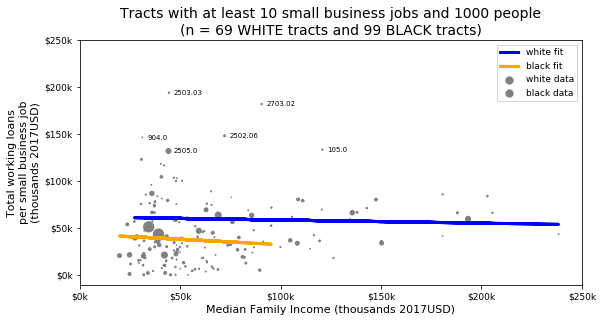

Linear model fit: mfi_adj = -0.033 * mfi_adj + $61,731 (r^2 = 0.002)
Linear model fit: mfi_adj = -0.116 * mfi_adj + $43,672 (r^2 = 0.002)


In [23]:
slopew, interceptw, r_valuew, p_valuew, std_errw = scipy.stats.linregress(
    tracts_included_df['mfi_adj'][(tracts_included_df['mfi_adj'].notnull()) & (tracts_included_df['excess_race'] == 'white')].values, 
    tracts_included_df['amtWorkingLoans_per_sbjob_adj'][(tracts_included_df['mfi_adj'].notnull()) & (tracts_included_df['excess_race'] == 'white')].values
)


slopeb, interceptb, r_valueb, p_valueb, std_errb = scipy.stats.linregress(
    tracts_included_df['mfi_adj'][(tracts_included_df['mfi_adj'].notnull()) & (tracts_included_df['excess_race'] == 'black')].values, 
    tracts_included_df['amtWorkingLoans_per_sbjob_adj'][(tracts_included_df['mfi_adj'].notnull()) & (tracts_included_df['excess_race'] == 'black')].values
)

fig, (ax1) = plt.subplots(1,1,figsize=(36*scale,18*scale))
siz = tracts_included_df['sb_jobs'].apply(lambda x: (x/2)*(scale**2)).tolist()

ax1.scatter(tracts_included_df['mfi_adj'][tracts_included_df['excess_race'] == 'white'], 
            tracts_included_df['amtWorkingLoans_per_sbjob_adj'][tracts_included_df['excess_race'] == 'white'], 
            s=siz, color='gray')

ax1.scatter(tracts_included_df['mfi_adj'][tracts_included_df['excess_race'] == 'black'], 
            tracts_included_df['amtWorkingLoans_per_sbjob_adj'][tracts_included_df['excess_race'] == 'black'], 
            s=siz, color='gray')

ax1.plot(tracts_included_df[
    (tracts_included_df['excess_race'] == 'white')
]['mfi_adj'], slopew*tracts_included_df[
    (tracts_included_df['excess_race'] == 'white')
]['mfi_adj'] + interceptw, color='blue', linewidth=12*scale)

ax1.plot(tracts_included_df[
    (tracts_included_df['excess_race'] == 'black')
]['mfi_adj'], slopeb*tracts_included_df[
    (tracts_included_df['excess_race'] == 'black')
]['mfi_adj'] + interceptb, color='orange', linewidth=12*scale)

ax1.set_xlabel('Median Family Income (thousands 2017USD)', fontsize=44*scale)
ax1.set_ylabel('Total working loans\nper small business job\n(thousands 2017USD)', fontsize=44*scale)

xticks = np.arange(0, 300000, 50000)
xlabels = ['${0:.0f}k'.format(x/1000) for x in xticks]
plt.xticks(xticks, xlabels, fontsize=36*scale)

#plt.ylim([0, 200000])
yticks = np.arange(0, 300000, 50000)
ylabels = ['${0:.0f}k'.format(x/1000) for x in yticks]
plt.yticks(yticks, ylabels, fontsize=36*scale)
plt.legend(['white fit', 'black fit', 'white data', 'black data'], fontsize=36*scale)

if (show_plot_labels):
    for ix, thisrow in tracts_included_df[tracts_included_df['mfi_adj'].notnull()].iterrows():
        if (thisrow['amtWorkingLoans_per_sbjob_adj'] > 125000):
            annotator = str(ix).replace('-', '- ')
            annotator = annotator.replace('/', '/ ')
            annotator = annotator.replace(' ', '\n')
            annotator = annotator.upper()
            ax1.annotate(annotator, 
                        xy=(thisrow['mfi_adj'], thisrow['amtWorkingLoans_per_sbjob_adj']), fontsize=28*scale,
                        xytext=(thisrow['mfi_adj'] + 2500, thisrow['amtWorkingLoans_per_sbjob_adj'] - 2000))

ax1.set_title('Tracts with at least {0:.0f} small business jobs and {1:.0f} people\n(n = {2:.0f} WHITE tracts and {3:.0f} BLACK tracts)'.format(
    jobs_lower_limit, 
    pop_lower_limit, 
    len(tracts_included_df[
        (tracts_included_df['excess_race'] == 'white')
        & (tracts_included_df['mfi_adj'].notnull())
    ]),
    len(tracts_included_df[
        (tracts_included_df['excess_race'] == 'black')
        & (tracts_included_df['mfi_adj'].notnull())
    ])

), fontsize=56*scale)

plt.savefig(figdir+'{0:}_fig8_scatter_by_mfi_and_race.jpg'.format(cityname_file), format='jpg', dpi=300*scale)
plt.show()

print('Linear model fit: mfi_adj = {0:.3f} * mfi_adj + ${1:,.0f} (r^2 = {2:.3f})'.format(slopew, interceptw, r_valuew**2))
print('Linear model fit: mfi_adj = {0:.3f} * mfi_adj + ${1:,.0f} (r^2 = {2:.3f})'.format(slopeb, interceptb, r_valueb**2))



In [24]:

correl_columns = ['pct_white', 'pct_black']
correl_columns += ['pct_female_householders', 'pct_hs_grad', 'pct_unemployed', 'pct_poverty']
correl_columns += ['mfi_adj', 'median_home_value']

htmlString = ''
htmlString += '<table>'
htmlString += '<tr>'
htmlString += '<th></th>'
for j in range(0, len(correl_columns)):
    thiscolname = correl_columns[j]
    htmlString += '<th>{0:}</th>'.format(thiscolname)
htmlString += '</tr>'
for i in range(0, len(correl_columns)):
    thiscol = correl_columns[i]
    htmlString += '<tr>'
    htmlString += '<td>{0:}</td>'.format(correl_columns[i])
    for j in range(0,i):
        htmlString += '<td>-</td>'
    for j in range(i, len(correl_columns)):
        thatcol = correl_columns[j]
        (r, p) = stats.pearsonr(
            tracts_included_df[thiscol][
                (tracts_included_df[thiscol].notnull()) & (tracts_included_df[thatcol].notnull()) 
            ].values, 
            tracts_included_df[thatcol][
                (tracts_included_df[thiscol].notnull()) & (tracts_included_df[thatcol].notnull()) 
            ].values
        )
        htmlString += '<td>{0:.3f}</td>'.format(r)
    htmlString += '</tr>'
htmlString += '</table>'

print('Correlations between demograhpic variables')
display(HTML(htmlString))
#for i in range(0, len(census_columns)):
#    for j in range(0, i):
#        
#    for j in range(i, correl_columns)

Correlations between demograhpic variables


,pct_white,pct_black,pct_female_householders,pct_hs_grad,pct_unemployed,pct_poverty,mfi_adj,median_home_value
pct_white,1.000,-0.986,-0.834,0.410,-0.705,-0.594,0.726,0.682
pct_black,-,1.000,0.831,-0.365,0.703,0.556,-0.697,-0.665
pct_female_householders,-,-,1.000,-0.510,0.739,0.616,-0.708,-0.688
pct_hs_grad,-,-,-,1.000,-0.594,-0.709,0.671,0.641
pct_unemployed,-,-,-,-,1.000,0.650,-0.646,-0.621
pct_poverty,-,-,-,-,-,1.000,-0.716,-0.557
mfi_adj,-,-,-,-,-,-,1.000,0.866
median_home_value,-,-,-,-,-,-,-,1.000


In [25]:
correl_columns = ['pct_white', 'pct_black']
correl_columns += ['pct_female_householders', 'pct_hs_grad', 'pct_unemployed', 'pct_poverty']
correl_columns += ['mfi_adj', 'median_home_value']

htmlString = ''
htmlString += '<table>'
htmlString += '<tr>'
htmlString += '<th></th>'
htmlString += '<th>Loan amount per<br />small business job</th>'
htmlString += '</tr>'
for i in range(0, len(correl_columns)):
    thiscol = correl_columns[i]
    htmlString += '<tr>'
    htmlString += '<td>{0:}</td>'.format(correl_columns[i])
    (r, p) = stats.pearsonr(
        tracts_included_df[thiscol][
            (tracts_included_df[thiscol].notnull()) & (tracts_included_df[thatcol].notnull()) 
        ].values, 
        tracts_included_df['amtWorkingLoans_per_sbjob_adj'][
            (tracts_included_df[thiscol].notnull()) & (tracts_included_df[thatcol].notnull()) 
        ].values
    )
    modifier = ''
    if (p < 0.05):
        modifier  = '*'
    elif (p < 0.01):
        modifier = '**'
    else:
        modifier = ''
    htmlString += '<td>{0:.3f}{1:}</td>'.format(r, modifier)
    htmlString += '</tr>'
htmlString += '</table>'

#print('Correlations between demograhpic variables')
display(HTML(htmlString))
#for i in range(0, len(census_columns)):
#    for j in range(0, i):
#        
#    for j in range(i, correl_columns)

,Loan amount persmall business job
pct_white,0.261*
pct_black,-0.269*
pct_female_householders,-0.120
pct_hs_grad,0.005
pct_unemployed,-0.158*
pct_poverty,-0.100
mfi_adj,0.123
median_home_value,0.061


# Additonal analysis: by number of black people per tract instead of percentage

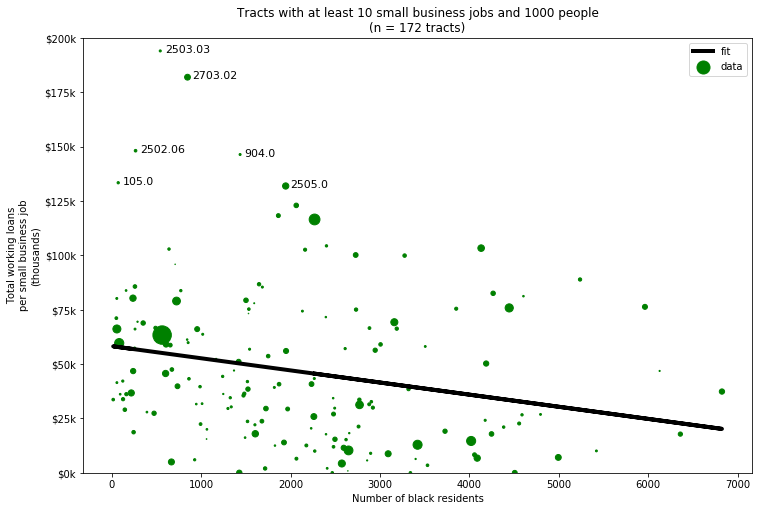

Linear model fit: amtWorkingLoans_adj_per_sb_job = -$5.58 * pop_black + $58,253 (r^2 = 0.055)


In [26]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    tracts_included_df['pop_black'].values, 
    tracts_included_df['amtWorkingLoans_per_sbjob_adj'].values
)

fig, (ax1) = plt.subplots(1,1, figsize=(12,8))
siz = tracts_df['sb_jobs'].apply(lambda x: x/10).tolist()

ax1.scatter(tracts_included_df['pop_black'], tracts_included_df['amtWorkingLoans_per_sbjob_adj'], 
            s=siz, color='green')

ax1.plot(tracts_included_df['pop_black'], slope*tracts_included_df['pop_black'] + intercept, 
         color='black', linewidth=4)

ax1.set_xlabel('Number of black residents')
ax1.set_ylabel('Total working loans\nper small business job\n(thousands)')

#xticks = np.arange(0, 1.2, 0.2)
#xlabels = ['{0:.0%}'.format(x) for x in xticks]
#plt.xticks(xticks, xlabels)

plt.ylim([0, 200000])
yticks = np.arange(0, 225000, 25000)
ylabels = ['${0:.0f}k'.format(x/1000) for x in yticks]
plt.yticks(yticks, ylabels)
plt.legend(['fit', 'data'])

if (show_plot_labels):
    for ix, thisrow in tracts_included_df.iterrows():
        if (thisrow['amtWorkingLoans_per_sbjob_adj'] > 125000):
            annotator = str(ix).replace('-', '- ')
            annotator = annotator.replace('/', '/ ')
            annotator = annotator.replace(' ', '\n')
            annotator = annotator.upper()
            ax1.annotate(annotator, 
                        xy=(thisrow['pop_black'], thisrow['amtWorkingLoans_per_sbjob_adj']), fontsize=11,
                        xytext=(thisrow['pop_black']+50, thisrow['amtWorkingLoans_per_sbjob_adj']-800))

ax1.set_title('Tracts with at least {0:.0f} small business jobs and {1:.0f} people\n(n = {2:.0f} tracts)'.format(
    jobs_lower_limit, 
    pop_lower_limit, 
    len(tracts_included_df)
))

plt.show()

signsign_slope = ''
if (np.sign(slope) == -1):
    signsign_slope = '-'
print('Linear model fit: amtWorkingLoans_adj_per_sb_job = {0:}${1:,.2f} * pop_black + ${2:,.0f} (r^2 = {3:.3f})'.format(signsign_slope, np.abs(slope), intercept, r_value**2))


In [27]:
print('{0:}'.format(cityname_display.upper()))
print('Number of tracts included in analysis: {0:.0f}'.format(summary['nTracts']))
print('Population included: {0:,.0f}'.format(summary['pop_total']))
print('Percent black residents: {0:.0%}'.format(summary['city_pct_black']))
print('\n')
print('Number of working loans: {0:,.0f}'.format(summary['nWorkingLoans']))
print('Total amount of working loans: ${0:,.0f}'.format(summary['amtWorkingLoans_adj']))
print('Number of small business jobs: {0:,.0f}'.format(summary['nSBjobs']))
print('\n')
print('Ratio of lending to white vs. black tracts: {0:,.2f}'.format(summary['lending_ratio_race']))

if (summary['lending_race_linear_fit'] < 0):
    displaystring = '(-${0:,.0f})'.format(np.abs(summary['lending_race_linear_fit']))
else:
    displaystring = '${0:,.0f}'.format(summary['lending_race_linear_fit'])

print('Linear fit of lending to percent black slope: {0:}'.format(displaystring))
print('Linear fit of lending to percent black r^2 value: {0:,.3f}'.format(summary['lending_race_linear_rsq']))

e = time.time()
g = g + (e-s)

print('\n')
print('Done! Total time {0:,.0f} minutes {1:,.0f} seconds!'.format(np.floor(g/60), g % 60))

BALTIMORE
Number of tracts included in analysis: 172
Population included: 556,542
Percent black residents: 63%


Number of working loans: 34,635
Total amount of working loans: $1,734,736,511
Number of small business jobs: 31,670


Ratio of lending to white vs. black tracts: 1.51
Linear fit of lending to percent black slope: (-$288)
Linear fit of lending to percent black r^2 value: 0.075


Done! Total time 3 minutes 58 seconds!
